In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from scipy.optimize import curve_fit

#Først behandles dataen til at finde relaterede størrelser og puttes distincte arrays:
class data:
    def __init__(self,data, dy):
        #Dataarrays tages fra datafilen
        self.t,ylod = np.loadtxt(data, unpack = True, usecols=(0,1), skiprows=2)
        self.y = -ylod + dy #det negative y er fordi at vi er interesseret i magnetens bevægelse, ikke loddet.
        self.datalength = len(self.t)
        #y-akse hastigheden findes:
        self.v = (self.y[1:]-self.y[:-1])/(self.t[1:]-self.t[:-1])
        
        #t gennemsnit (relevant når tid skal tilknyttes til hastigheder)
        self.tgen = (self.t[1:]+self.t[:-1])/2
    
    #Gemmer masseværdier
    def maal(self,mlod,mmag):
        self.mlod = mlod
        self.mmag = mmag
        
    #Finder fejl på data (Fejlen findes ved at finde gennemsnitsforskellen på 4 trackninger af samme forsøg)
    def error(self,errdata):
        t,ylod1,ylod2,ylod3,ylod4 = np.loadtxt(errdata, unpack = True, usecols=(0,1,2,3,4), skiprows=3)
        self.y1,self.y2,self.y3,self.y4 = -ylod1,-ylod2,-ylod3,-ylod4
        
        self.yerr = sum((abs(self.y1-self.y2)+abs(self.y3-self.y4))/2)/len(self.y1) #positionsfejl
        self.yerrs = np.full(self.datalength, self.yerr)
        
        
    #Fitter data
    def fit(self,func,guess):
        self.popt, self.pcov = curve_fit(func,self.t,self.y,p0=guess,sigma=self.yerrs,absolute_sigma=True) #Fit dannes
        
        #Plotteværdier til fit
        self.tfit = np.linspace(min(self.t),max(self.t),10000)
        self.yfit = func(self.tfit,*self.popt)
        
        #Goodness of fit
        self.chimin = np.sum(((self.y-func(self.t, *self.popt))/self.yerrs)**2) #Chimin findes ud fra ligning 5.9 i HH
        self.df = len(self.y)-len(self.popt) #degrees of freedom
        self.P = ss.chi2.sf(self.chimin,self.df) #P-værdien ved antal frihedsgrader for det givne polynomie findes.
        
        #Sammenligning af forventet og mål acceleration
        self.amaal = self.popt[2]
        self.amaalfejl = np.linalg.norm(np.diagonal(self.pcov))
        self.ateori = (self.mlod-self.mmag)/((self.mlod+self.mmag))*9.816

    #Plotter data
    def plot(self,label,xlabel,ylabel,title,marker,ls,capsize):
        ax.errorbar(self.t,self.y,yerr=self.yerrs,label=label, marker=marker,ls=ls,capsize=capsize)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.legend()
        ax.grid()
        fig.tight_layout()
    #Plotter fit
    def fitplot(self,fitname):
        ax.plot(self.tfit,self.yfit,label= fitname +'\n'+'Goodness of fit: P({:1.2};{}) = {:1.2}'.format(self.chimin,self.df,self.P) + '\n' + 'Teoretisk acceleration: {:1.3} m/s^2'.format(self.ateori) + '\n' +'Målts acceleration: {:1.5} +- {:1.2} m/s^2'.format(self.amaal,self.amaalfejl))
        ax.legend()
        fig.tight_layout()

        
        


    


In [8]:
#Mål for kalibrering uden magnet (1)
mlod1 = 0.0202 #kg
mmag1 = 0.0402 #kg #Her er det ikke en magnet med et tungt ikke magnetisk lod
dy1 = 0.08674 #m

#Mål for kalibrering frit fald magnet (2)
mlod2 = 0 #kg
mmag2 = 0.0425 #kg
dy2 = -0.251 #m

#Mål for kalibrering uden ror let lod (3)
mlod3 = 5.1*10**(-3) #kg
mmag3 = 0.0425 #kg
dy3 = 0.538 - 0.251 #m

#Mål for kalibrering uden ror tungt lod (4)
mlod4 = 0.0202 #kg
mmag4 =  0.0425 #kg
dy4 = 0.505 - 0.251 #m

#Fitning efter konstant acceleration (uden vindmodstand)
def afunc(t,*p):
    s0 = p[0]
    v0 = p[1]
    a = p[2]
    return s0+(v0*t)+(1/2)*a*(t**2)







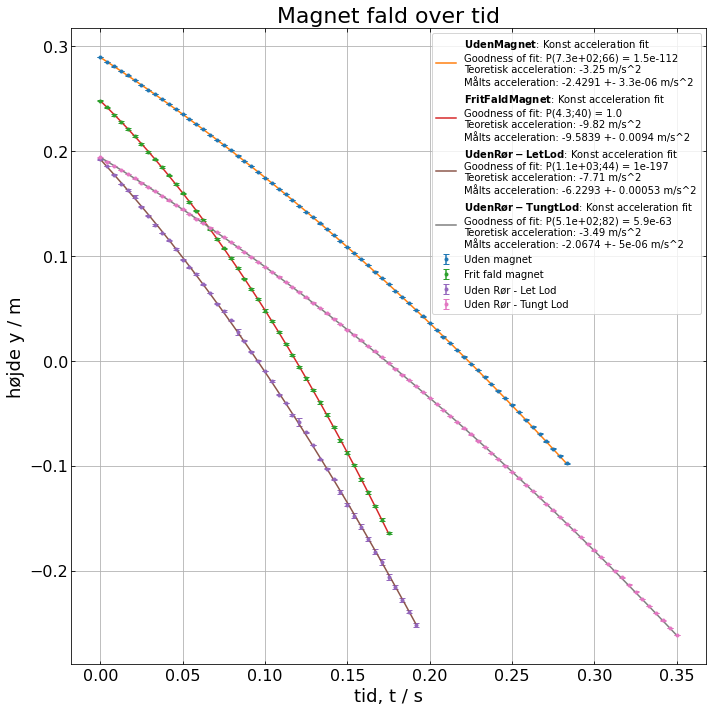

In [10]:
#Figuren introduceres af tilpasses
fig, ax = plt.subplots(figsize=(10,10))
plt.rc("axes", labelsize=18, titlesize=22) 
plt.rc("xtick", labelsize=16, top=True, direction="in")
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("legend", fontsize=10)


data1 = data("./Induktionsbremsedata/Kalibrering/Kalibrering uden magnet.txt",dy1)
data1.maal(mlod1,mmag1)
data1.error("./Induktionsbremsedata/Kalibrering/Kalibrering fejl uden magnet.txt")
data1.fit(afunc,[-0.15,-3,2])
data1.plot('Uden magnet','tid, t / s','højde y / m', 'Magnet fald over tid', '.', ' ',3)
data1.fitplot('$\\bf{Uden Magnet}$: Konst acceleration fit')

data2 = data("./Induktionsbremsedata/Kalibrering/Kalibrering frit fald magnet.txt",dy2)
data2.maal(mlod2,mmag2)
data2.error("./Induktionsbremsedata/Kalibrering/Kalibrering fejl frit fald magnet.txt")
data2.fit(afunc,[-0.15,-3,2])
data2.plot('Frit fald magnet','tid, t / s','højde y / m', 'Magnet fald over tid', '.', ' ',3)
data2.fitplot('$\\bf{Frit Fald Magnet}$: Konst acceleration fit')

ax.grid()
data3 = data("./Induktionsbremsedata/Kalibrering/Kalibrering uden ror let lod.txt",dy3)
data3.maal(mlod3,mmag3)
data3.error("./Induktionsbremsedata/Kalibrering/Kalibrering fejl uden ror let lod.txt")
data3.fit(afunc,[-0.15,-3,2])
data3.plot('Uden Rør - Let Lod','tid, t / s','højde y / m', 'Magnet fald over tid', '.', ' ',3)
data3.fitplot('$\\bf{Uden Rør-Let Lod}$: Konst acceleration fit')

data4 = data("./Induktionsbremsedata/Kalibrering/Kalibrering uden ror tungt lod.txt",dy4)
data4.maal(mlod4,mmag4)
data4.error("./Induktionsbremsedata/Kalibrering/Kalibrering fejl uden ror tungt lod.txt")
data4.fit(afunc,[-0.15,-3,2])
data4.plot('Uden Rør - Tungt Lod','tid, t / s','højde y / m', 'Magnet fald over tid', '.', ' ',3)
data4.fitplot('$\\bf{Uden Rør-Tungt Lod}$: Konst acceleration fit')

NameError: name 'plot' is not defined

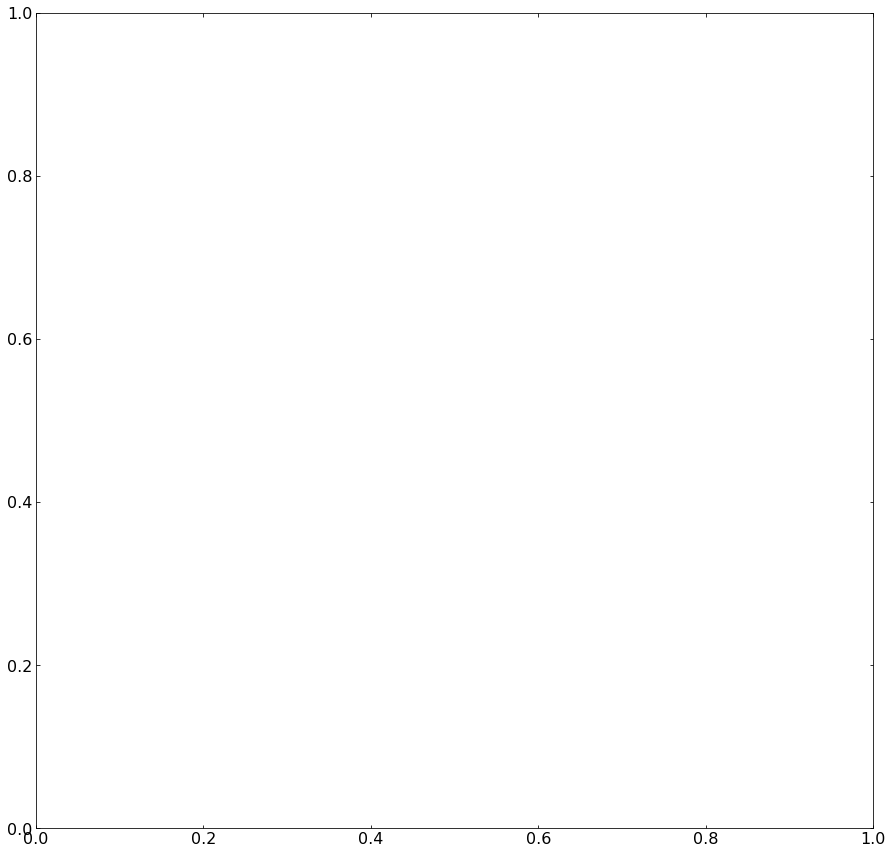